<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 40px; height: 80px">
<img src="https://misk.org.sa/miskacademy/wp-content/uploads/sites/5/2018/04/ma-logo-en.png" style="float: right; margin: 30px; height: 90px">
# Final Project
_by: Ruba A. Almarroti _ <br>
_Instructors: James Larkin & Ahmad Alrasheed _

---


<img src="http://okckids.com/__data/bdda9de30503a7eaa22234431b013197.png" style="height: 150px"> 
## 1. Introducation


### 1.1 Overview

> Donorschoose.org is a nonprofit organization that allows individuals to donate directly to public school classroom projects. <br>
Teachers from public schools post request for funding project with a short essay describing it. Donors all around the world can look at these projects when they login to Donorschoose.org and donate to projects of their choice. The idea is to have personalized recommendation webpage for all the donors, which will show them the projects, which they prefer, like and love to donate. Implementing the recommender system for DonorsChoose.org website will improve user experience and help more projects to meet their funding goals. It also will help us in understanding the donors’ preferences and delivering to them what they want or value. One type of recommendation system can be designed by predicting projects that will less likely to meet funding goal, segmenting and profiling the donors and using that information for recommending right projects when the donors login to DonorsChoose.org. 

### 1.2 Problem Statement

 > According to Donors Choose, each proposal takes up to 8 minutes to process. At that rate, 150,000 proposals would require an estimated total 20,000 hours of volunteer time. Donors Choose employs a team of 50 volunteers to screen proposals. This does not include in-house paid staff needed to manage the effort. 
 
> As Donors Choose continues to experience high growth, it will become unsustainable to have all projects reviewed manually. A tool that can automate even part of the approval process will enable the organization to scale and support its growth. If a tool can automatically approve even just 30% of the “good” projects, at the current volume of projects, that translates to nearly 6,000 hours in savings

### 1.3 Dataset

### 1.4 Objective:
Explore and identify the factors that most affects the project approval status and build an approval process pipeline to help Donorschoose.org with the vetting process of approving a project.

## 2. Retrieving the Data

### 2.1 Set Environment

In [1]:

# import required packges
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack, csr_matrix
#NLP
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas_profiling as pp

### 2.2 Loading Data

In [2]:
#read required data
train_df = pd.read_csv('Data/train.csv',sep=',',parse_dates=['project_submitted_datetime'])
test_df = pd.read_csv('Data/test.csv',sep=',',parse_dates=['project_submitted_datetime'])
resource_df = pd.read_csv('Data/resources.csv');


In [3]:
print(train_df.shape,test_df.shape,resource_df.shape)

(182080, 16) (78035, 15) (1541272, 4)


* There are about 180k entries in the train data set with 16 features included the target one. 
* There are about 78K  entries in the test data set.
* There are more than 1M entries in the resources data set with 4 features.

In [4]:
#combine train & test for exploration
train_df['is_train'] = 1; test_df['is_train'] = 0
df = pd.concat([train_df, test_df])

## 3. Data Exploration

### 3.1 Projects Dataset

#### 3.1.1 General Overview

In [5]:
#Overview
df.head()

,id,is_train,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_grade_category,project_is_approved,project_resource_summary,project_subject_categories,project_subject_subcategories,project_submitted_datetime,project_title,school_state,teacher_id,teacher_number_of_previously_posted_projects,teacher_prefix
0,p036502,1,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,Grades PreK-2,1.0,My students need 6 Ipod Nano's to create and d...,Literacy & Language,Literacy,2016-11-18 14:45:59,Super Sight Word Centers,NV,484aaf11257089a66cfedc9461c6bd0a,26,Ms.
1,p039565,1,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,Grades 3-5,0.0,My students need matching shirts to wear for d...,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",2017-04-26 15:57:28,Keep Calm and Dance On,GA,df72a3ba8089423fa8a94be88060f6ed,1,Mrs.
2,p233823,1,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,Grades 3-5,1.0,My students need the 3doodler. We are an SEM s...,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",2017-01-01 22:57:44,Lets 3Doodle to Learn,UT,a9b876a9252e08a55e3d894150f75ba3,5,Ms.
3,p185307,1,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,Grades 3-5,0.0,My students need balls and other activity equi...,Health & Sports,Health & Wellness,2016-08-12 15:42:11,"\""Kid Inspired\"" Equipment to Increase Activit...",NC,525fdbb6ec7f538a48beebaa0a51b24f,16,Mr.
4,p013780,1,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,Grades 6-8,1.0,My students need a water filtration system for...,Health & Sports,Health & Wellness,2016-08-06 09:09:11,We need clean water for our culinary arts class!,CA,a63b5547a7239eae4c1872670848e61a,42,Mr.


In [6]:
#check data types
df.dtypes

id                                                      object
is_train                                                 int64
project_essay_1                                         object
project_essay_2                                         object
project_essay_3                                         object
project_essay_4                                         object
project_grade_category                                  object
project_is_approved                                    float64
project_resource_summary                                object
project_subject_categories                              object
project_subject_subcategories                           object
project_submitted_datetime                      datetime64[ns]
project_title                                           object
school_state                                            object
teacher_id                                              object
teacher_number_of_previously_posted_projects           

* The dataset contain variety of features: (2) numerical variables,(1) datetime variables, and (13) string variables.

In [7]:
#check missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).head()

,Total,Percent
project_essay_3,251037,96.510005
project_essay_4,251037,96.510005
project_is_approved,78035,30.000192
teacher_prefix,5,0.001922
is_train,0,0.000000


* 'teacher_prifix' have 5 missing values
* 'project_essay_3' and project_essay_4 have 96.5% missing values
* The missing values in project_is_approved are belong to test data set which does not include the target variable.


In [8]:
#check columns duplicate
df.duplicated().sum()

0

#### 3.1.2 Statistical Overview 

In [9]:
#numerical variables
df.describe()

,is_train,project_is_approved,teacher_number_of_previously_posted_projects
count,260115.000000,182080.000000,260115.000000
mean,0.699998,0.847682,11.248463
std,0.458259,0.359330,28.005731
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000
75%,1.000000,1.000000,9.000000
max,1.000000,1.000000,451.000000


* The minimum number of previosly posted project is 0 while the maximum number is 451
* 50% of the teachers posted 2 or less applications. while the average of the previosly posted project is 11
which can tell us there are a few teachers submitted too many times which cause the distribution to be right skewed.
* ~ 85% of the application was apporved


In [10]:
#categorical variables
df.describe(include = ['O'])

,id,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_grade_category,project_resource_summary,project_subject_categories,project_subject_subcategories,project_title,school_state,teacher_id,teacher_prefix
count,260115,260115,260115,9078,9078,260115,260115,260115,260115,260115,260115,260115,260110
unique,260115,199838,258104,9045,9003,4,255588,51,416,230309,51,132133,5
top,p201655,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,The tables would replace desks that are fallin...,"Having taught engineering in college, I have c...",Grades PreK-2,My students need electronic tablets to do all ...,Literacy & Language,Literacy,Flexible Seating,CA,df8a4b7ad173b57f7ac52e447cc24043,Mrs.
freq,1,67,35,3,4,105361,116,56034,22634,544,36418,108,136387


In [11]:
 1 - (199838 / 260115)

0.23173211848605424

* 23% of the essays are common between multiple projects
* The most common teacher prefix is Mrs
* 544 projects are titled with "Flexible Seating"
* There are 4 grades, and the most common one is Grades preK-2


#### 3.1.3 Visualization 

##### 3.1.3.1 Distrbution of 'teacher_number_of_previously_posted_projects'

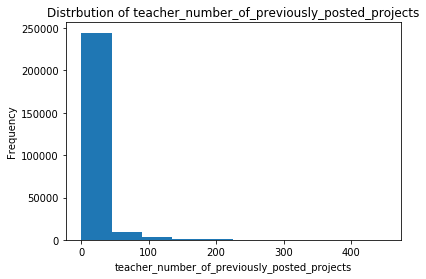

In [12]:
#Histogram of 'teacher_number_of_previously_posted_projects'
plt.hist(df["teacher_number_of_previously_posted_projects"])
plt.title('Distrbution of teacher_number_of_previously_posted_projects')
plt.xlabel('teacher_number_of_previously_posted_projects');
plt.ylabel('Frequency');
plt.show()

In [13]:
pro = (df[df.teacher_number_of_previously_posted_projects == 0].teacher_number_of_previously_posted_projects.value_counts())/ len(df.teacher_number_of_previously_posted_projects) * 100
print("* %.2f%% of teachers never post project before" %pro)

* 27.47% of teachers never post project before


##### 3.1.3.2

In [14]:
# Sorry this part not completed yet :)

### 3.2 Resources Dataset

In [15]:
# Sorry, I don't have time to go through it one by one, ProfileReport save my time :D
pp.ProfileReport(resource_df)

Number of variables,4
Number of observations,1541272
Total Missing (%),0.0%
Total size in memory,47.0 MiB
Average record size in memory,32.0 B
Numeric,2
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## 4. Data Preparation

### 4.1 Dealing with missing values

#### 4.1.1 teacher_prefix
Fill missing values of __teacher_prefix__ with the most occurrence one which is 'Mrs'.

In [16]:
#Fill missing values
df['teacher_prefix'].fillna('Mrs.', inplace=True)

#### 4.1.2 project_essay_3 & project_essay_4

>Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:

>project_essay_1: "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."

>project_essay_2: "About your project: How will these materials make a difference in your students' learning and improve their school lives?"

So since the project_essay_3 & project_essay_4 combined with 1 and 2, we can solve the missing values by concatenate 1 with 2 and 3 with 4 for all applications befor May 17,2016

In [17]:
df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_1'] = df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_1'] + ' ' + df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_2']
df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_2'] = df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_3'] + ' ' + df.loc[df.project_submitted_datetime.dt.date < datetime.date(2016, 5, 7), 'project_essay_4']
df.drop(['project_essay_3', 'project_essay_4'], axis=1, inplace=True)

#### 4.1.3 description

In [18]:
resource_df['description'].fillna('', inplace=True)

### 4.2 Resources Features

Resources data set contains the details of the resources requsted for projects. each project may have more than one resource requsted <br>
So, in order to merge projects and resources dataset and extract valuable features the following steps have been taken:

#### 4.2.1 Steps:
* create new feature __cost__ from multiplying __quantity__ with __price__
* aggregate project cost by project id with sum and count functions
* aggregate project description by project id and concatenate them with space
* merge resources dataset with project dataset by 'id'

In [19]:
resource_df['cost'] = resource_df['quantity'] * resource_df['price']
res_nums = pd.DataFrame(resource_df[['id', 'cost']].groupby('id').cost.agg(['count', 
                                                                             'sum', 
                                                                             ])).reset_index()
res_nums = res_nums.rename(columns={'count': 'res_count', 
                                    'sum': 'res_sum'
                                     })
res_descp = resource_df[['id', 'description']].groupby('id').description.agg([ lambda x: ' '.join(x) ]).reset_index().rename(columns={'<lambda>':'res_description'})
resouse_df = res_nums.merge(res_descp, on='id', how='left')
df = df.merge(resouse_df, on='id', how='left')

### 4.3 DateTime Features

From DateTime column, I've extracted year,month, day, day of week, and hour as below:

In [20]:
date = 'project_submitted_datetime'

df['year'] = df[date].apply(lambda x: x.year)
df['month'] = df[date].apply(lambda x: x.month)
df['day'] = df[date].apply(lambda x: x.day)
df['dow'] = df[date].apply(lambda x: x.dayofweek)
df['hour'] = df[date].apply(lambda x: x.hour)

df.drop('project_submitted_datetime', axis=1, inplace=True)

### 4.4 Categorical Features

For categorical features we need to convert the columns to numbers with encoding techniques.<br>
Steps for achieving that listed below:

#### 4.4.1:check number of unique values in each categorical column

In [21]:
#check number of unique values
print(df.teacher_prefix.nunique())
print(df.project_grade_category.nunique())
print(df.school_state.nunique())
print(df.project_subject_categories.nunique())
print(df.project_subject_subcategories.nunique())

5
4
51
51
416


#### 4.4.2  One-Hot Encoding 
__teacher_prefix__ and __project_grade_category__ have few categories so I'll encode them with One-Hot Encoding

In [22]:
#One-Hot Encoding
df = pd.concat([df,
                   pd.get_dummies(df['teacher_prefix'], drop_first=True),
                   pd.get_dummies(df['project_grade_category'], drop_first=True)], axis=1)
# drop the original columns
df.drop(['teacher_prefix', 'project_grade_category'], axis=1, inplace=True)

In [23]:
df.head()

,id,is_train,project_essay_1,project_essay_2,project_is_approved,project_resource_summary,project_subject_categories,project_subject_subcategories,project_title,school_state,...,day,dow,hour,Mr.,Mrs.,Ms.,Teacher,Grades 6-8,Grades 9-12,Grades PreK-2
0,p036502,1,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,1.0,My students need 6 Ipod Nano's to create and d...,Literacy & Language,Literacy,Super Sight Word Centers,NV,...,18,4,14,0,0,1,0,0,0,1
1,p039565,1,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,0.0,My students need matching shirts to wear for d...,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,GA,...,26,2,15,0,1,0,0,0,0,0
2,p233823,1,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,1.0,My students need the 3doodler. We are an SEM s...,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,UT,...,1,6,22,0,0,1,0,0,0,0
3,p185307,1,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",0.0,My students need balls and other activity equi...,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",NC,...,12,4,15,1,0,0,0,0,0,0
4,p013780,1,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,1.0,My students need a water filtration system for...,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,CA,...,6,5,9,1,0,0,0,1,0,0


#### 4.4.3 Target Encoding

Since the __school_state__ have more than 50 unique values, and in order to avoid create lots of new features; I'll use target encoding(aka : mean encoding) to encode this column. <br>
I've used [Olivir](https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features) target_encode function which is based on [Daniele Micci-Barreca paper](https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf)

In [24]:
def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return ft_trn_series, ft_tst_series

In [25]:
# split the data back into training and testing

train = df[df['is_train'] == 1]
test = df[ df['is_train'] == 0]
test.drop('project_is_approved', axis=1, inplace=True)  
train.drop('is_train', axis=1, inplace=True)
test.drop('is_train', axis=1, inplace=True)

# target_encode
train['school_state'], test['school_state'] = target_encode(train['school_state'], test['school_state'], train['project_is_approved'])

In [26]:
train.head()

,id,project_essay_1,project_essay_2,project_is_approved,project_resource_summary,project_subject_categories,project_subject_subcategories,project_title,school_state,teacher_id,...,day,dow,hour,Mr.,Mrs.,Ms.,Teacher,Grades 6-8,Grades 9-12,Grades PreK-2
0,p036502,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,1.0,My students need 6 Ipod Nano's to create and d...,Literacy & Language,Literacy,Super Sight Word Centers,0.856770,484aaf11257089a66cfedc9461c6bd0a,...,18,4,14,0,0,1,0,0,0,1
1,p039565,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,0.0,My students need matching shirts to wear for d...,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,0.834087,df72a3ba8089423fa8a94be88060f6ed,...,26,2,15,0,1,0,0,0,0,0
2,p233823,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,1.0,My students need the 3doodler. We are an SEM s...,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,0.835110,a9b876a9252e08a55e3d894150f75ba3,...,1,6,22,0,0,1,0,0,0,0
3,p185307,My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",0.0,My students need balls and other activity equi...,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",0.853480,525fdbb6ec7f538a48beebaa0a51b24f,...,12,4,15,1,0,0,0,0,0,0
4,p013780,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,1.0,My students need a water filtration system for...,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,0.856431,a63b5547a7239eae4c1872670848e61a,...,6,5,9,1,0,0,0,1,0,0


#### 4.4.4 TfidfVectorizer

In [27]:
def getCatFeatures(train,test, Col):
    vectorizer = TfidfVectorizer(binary=True,
                                 ngram_range=(1,1),
                                 tokenizer=lambda x:[a.strip() for a in x.split(',')])
    
    return vectorizer.fit_transform(train[Col].fillna('')),vectorizer.transform(test[Col]),vectorizer.get_feature_names()


train_categories,test_categories,categories_names = getCatFeatures(train,test, 'project_subject_categories')
train_subcategories,test_subcategories,subcategories_names  = getCatFeatures(train,test, 'project_subject_subcategories')



In [28]:
vectored_categories = pd.DataFrame(train_categories.todense(),
                   columns=categories_names,)

vectored_categories.head()

,applied learning,care & hunger,health & sports,history & civics,literacy & language,math & science,music & the arts,special needs,warmth
0,0.0,0.0,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.669844,0.0,0.00000,0.000000,0.742502,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.66233,0.749212,0.000000,0.0,0.0
3,0.0,0.0,1.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,1.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0


In [29]:
vectored_subcategories = pd.DataFrame(train_subcategories.todense(),
                   columns=subcategories_names,)

vectored_subcategories.head()

,applied sciences,care & hunger,character education,civics & government,college & career prep,community service,early development,economics,environmental science,esl,...,music,nutrition education,other,parent involvement,performing arts,social sciences,special needs,team sports,visual arts,warmth
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.715759,0.0,0.0,0.698347,0.0,0.0
2,0.787603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


### 4.4 Text Features

#### 4.4.1 preProcess

In [30]:
import re
from nltk.stem import PorterStemmer
p = PorterStemmer()
def preProcess(text):
    """
        text: a string     
        return: modified initial string
    """
    return ' '.join([p.stem(x.lower()) for x in re.split('\W',text) if len(x) >= 1])


#### 4.4.2 TfidfVectorizer

In [31]:
def getTextFeatures(Col, max_features=10000):
    print('processing: ', Col)
    vectorizer = TfidfVectorizer(stop_words=stop,
                                 preprocessor=preProcess,
                                 max_features=max_features,
                                 max_df=0.9, min_df=5,
                                 binary=True,
                                 
                                 ngram_range=(1,2))
    
    train_features = vectorizer.fit_transform(train[Col])
    test_features = vectorizer.transform(test[Col])
    return train_features,test_features,vectorizer.get_feature_names()
train_essay_1,test_essay_1,essay_1_names = getTextFeatures('project_essay_1', max_features=5000)
train_essay_2, test_essay_2,essay_2_names = getTextFeatures('project_essay_2', max_features=7000)
train_resource_summary,test_resource_summary,resource_summary_names = getTextFeatures('project_resource_summary', max_features=1000)
train_res_description,test_res_description,res_description_names = getTextFeatures('res_description', max_features=1000)
train_project_title , test_project_title,project_title_names = getTextFeatures('project_title', max_features=500)

processing:  project_essay_1
processing:  project_essay_2
processing:  project_resource_summary
processing:  res_description
processing:  project_title


In [32]:
vectored_essay_1 = pd.DataFrame(train_project_title.todense(),
                   columns= project_title_names,)

#vectored_essay_1.head()
#train_project_title.todense()


### 4.5 Numerical Features

In [33]:
# Normalization
num_cols = ['teacher_number_of_previously_posted_projects', 'res_count', 'res_sum','year','month','day','dow','hour'] 
std_scaler = MinMaxScaler()
train[num_cols] = std_scaler.fit_transform(train[num_cols].values)
test[num_cols] = std_scaler.transform(test[num_cols].values)

### 4.6 Sum everything up

In [34]:
#identify target
y = train_df['project_is_approved'].values

#drop unneeded columns
to_drop = ['id','teacher_id','project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_resource_summary','res_description']
for col in to_drop:
    train.drop([col], axis=1, inplace=True)
    test.drop([col], axis=1, inplace=True)
train.drop('project_is_approved', axis=1, inplace=True)


In [35]:
X_full = csr_matrix(hstack([train.values,train_essay_1 , train_essay_2 , train_resource_summary , train_res_description, train_project_title , train_categories , train_subcategories ]))
X_test_full = csr_matrix(hstack([test.values,test_essay_1 , test_essay_2 , test_resource_summary , test_res_description, test_project_title , test_categories , test_subcategories]))



## 5. Boosting Algorithms

In [36]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, test_size=0.20, random_state=42)

### 5.1 XGBoost

In [38]:
xgb_params = {'eta': 0.2, 
                  'max_depth': 5, 
                  'subsample': 0.8, 
                  'colsample_bytree': 0.8, 
                  'objective': 'binary:logistic', 
                  'eval_metric': 'auc', 
                  'seed': 1234
                 }

In [44]:
import time
start_time=time.time()
d_train = xgb.DMatrix(X_train, y_train)
d_valid = xgb.DMatrix(X_valid, y_valid)
d_test = xgb.DMatrix(X_train)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
model_xgb = xgb.train(xgb_params, d_train, 500, watchlist, verbose_eval=200, early_stopping_rounds=20);
end_time=time.time()
print("total time till XGB model",end_time-start_time,"s");

[22:57:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[0]	train-auc:0.668788	valid-auc:0.662991
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.


Exception ignored in: <bound method Booster.__del__ of <xgboost.core.Booster object at 0x000001F505483BE0>>
Traceback (most recent call last):
  File "C:\Users\rubaa\Anaconda3\lib\site-packages\xgboost\core.py", line 868, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


[22:57:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[22:57:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[22:57:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[22:58:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[22:58:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[22:58:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[22:58:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:01:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[23:01:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[23:01:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[23:01:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[23:01:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[23:01:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[23:01:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:04:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[23:04:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[23:04:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[23:04:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[23:04:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=5
[23:04:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[23:04:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:07:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[23:07:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[23:07:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[23:07:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[23:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[23:07:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[23:08:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [45]:
from sklearn.metrics import roc_auc_score
start_time=time.time()
xgb_pred_test = model_xgb.predict(d_test)
xgb_pred_valid = model_xgb.predict(d_valid)
auc = roc_auc_score(y_valid, xgb_pred_valid)
print('AUC:',auc)
end_time=time.time()
print("total time till XGB model",end_time-start_time,"s")

AUC: 0.775136591066
total time till XGB model 1.1886742115020752 s


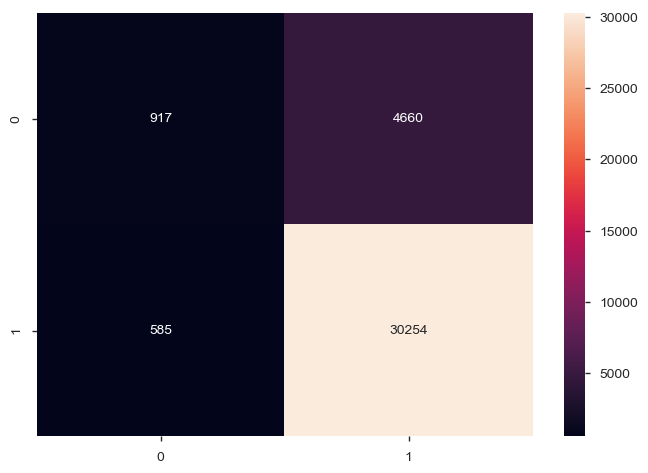

In [46]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_valid, xgb_pred_valid.round())

df_cm = pd.DataFrame(arr, range(2),
                  range(2))
sns.heatmap(df_cm, annot=True,fmt='g')# font size


### 5.2 LGBM

In [47]:
# Using LGBM params from https://www.kaggle.com/opanichev/lightgbm-and-tf-idf-starter/code
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'max_depth': 16,
        'num_leaves': 31,
        'learning_rate': 0.25,
        'feature_fraction': 0.85,
        'bagging_fraction': 0.85,
        'bagging_freq': 5,
        'verbose': 1,
        'num_threads': 4,
        'lambda_l2': 1,
        'min_gain_to_split': 0,
        'seed':1234
} 

In [48]:
start_time=time.time()
model = lgb.train(
        params,
        lgb.Dataset(X_train, y_train),
        num_boost_round=10000,
        valid_sets=[lgb.Dataset(X_valid, y_valid)],
        early_stopping_rounds=100,
        verbose_eval=25)
end_time=time.time()
print("total time till LGB model",end_time-start_time,"s")

Training until validation scores don't improve for 100 rounds.
[25]	valid_0's auc: 0.770683
[50]	valid_0's auc: 0.778337
[75]	valid_0's auc: 0.779362
[100]	valid_0's auc: 0.780306
[125]	valid_0's auc: 0.77914
[150]	valid_0's auc: 0.777589
[175]	valid_0's auc: 0.776634
[200]	valid_0's auc: 0.775446
Early stopping, best iteration is:
[100]	valid_0's auc: 0.780306
total time till LGB model 439.2733771800995 s


In [49]:
start_time=time.time()
valid_preds = model.predict(X_valid, num_iteration=model.best_iteration)
test_preds = model.predict(X_test_full, num_iteration=model.best_iteration)
auc = roc_auc_score(y_valid, valid_preds)
print('AUC:',auc)
#plt.show()
end_time=time.time()
print("total time till LGB model",end_time-start_time,"s")

AUC: 0.780306087183
total time till LGB model 1.6823906898498535 s


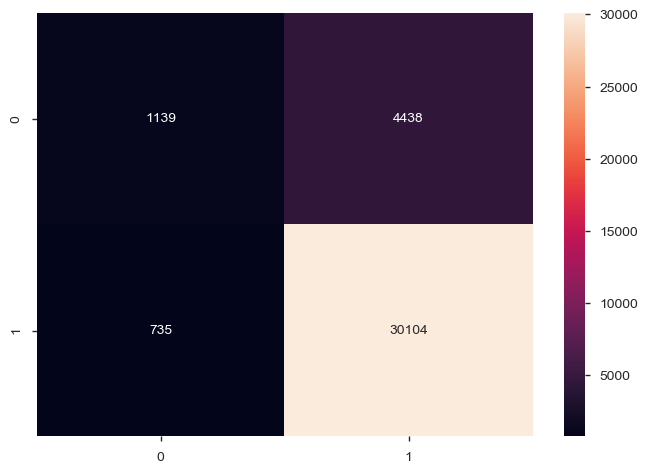

In [50]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(y_valid, valid_preds.round())

df_cm = pd.DataFrame(arr, range(2),
                  range(2))
sn.heatmap(df_cm, annot=True,fmt='g')# font size

### 5.3 ROC curve

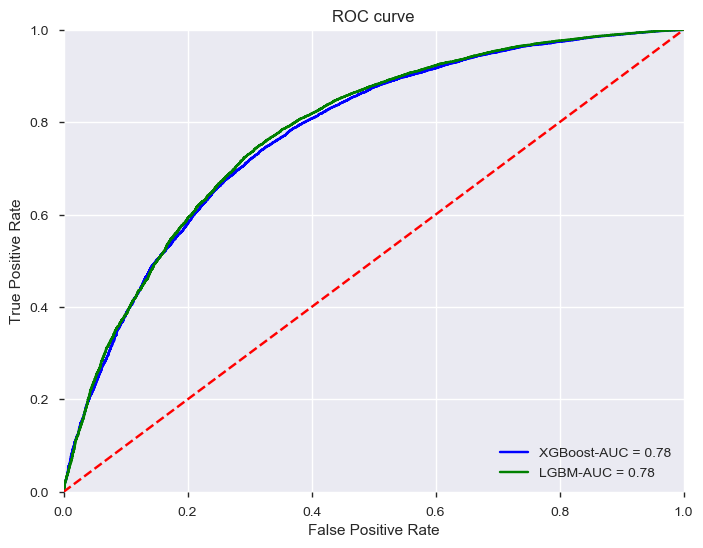

In [51]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,thresholds=roc_curve(y_valid, xgb_pred_valid)
roc_auc = metrics.auc(fpr, tpr)
fpr_1,tpr_1,thresholds_1=roc_curve(y_valid,valid_preds)
roc_auc_1 = metrics.auc(fpr_1, tpr_1)
plt.figure(figsize=(8,6))
plt.title('ROC curve')
plt.plot(fpr, tpr, 'b', label = 'XGBoost-AUC = %0.2f' % roc_auc)
plt.plot(fpr_1, tpr_1, 'g', label = 'LGBM-AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Conclusion